<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдем-MAE-между-нашими-расчётами-и-значением-признака." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-Вычислим-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдем-MAE-между-нашими-расчётами-и-значением-признака.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Проведем-предобработку-данных" data-toc-modified-id="Проведем-предобработку-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проведем предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-(feed-size)-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-(feed-size)-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул (feed size) сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией,-выберем-лучшую-модель" data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией,-выберем-лучшую-модель-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией, выберем лучшую модель</a></span></li><li><span><a href="#Проверим-качество--лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверим-качество--лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверим качество  лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверим-модели-на-вменяемость" data-toc-modified-id="Проверим-модели-на-вменяемость-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверим модели на вменяемость</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для компании «Цифра», которая разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды и   оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Загрузка и подготовка данных

Откроем файл с данными, изучим общую информацию и подготовим данные.

Данные находятся в трёх файлах:: 

- gold_recovery_train_new.csv — обучающая выборка
- gold_recovery_test_new.csv — тестовая выборка
- gold_recovery_full_new.csv — исходные данные



Таким образом, исследование пройдёт в четыре этапа:

- Загрузка и подготовка данных.
- Анализ данных.
- Построение модели.
- Вывод.

Исследование:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# чтение файлов с данными и сохранение 
gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
gold_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [6]:
gold_train.duplicated().sum()

0

In [7]:
#посмотрим дубликаты
gold_train.duplicated(subset=['date'], keep=False).sum() 

0

In [8]:
gold_train.isna().sum().sort_values(ascending = False)  

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64

In [9]:
round(gold_train.isna().sum()/gold_train.shape[0]*100).sort_values(ascending = False) 

secondary_cleaner.output.tail_sol                11.0
rougher.input.floatbank11_xanthate                3.0
rougher.state.floatbank10_e_air                   3.0
primary_cleaner.output.concentrate_sol            2.0
secondary_cleaner.state.floatbank2_a_air          2.0
                                                 ... 
rougher.calculation.sulfate_to_au_concentrate     0.0
primary_cleaner.state.floatbank8_d_level          0.0
primary_cleaner.state.floatbank8_d_air            0.0
primary_cleaner.state.floatbank8_c_level          0.0
secondary_cleaner.state.floatbank6_a_level        0.0
Length: 87, dtype: float64

<AxesSubplot:>

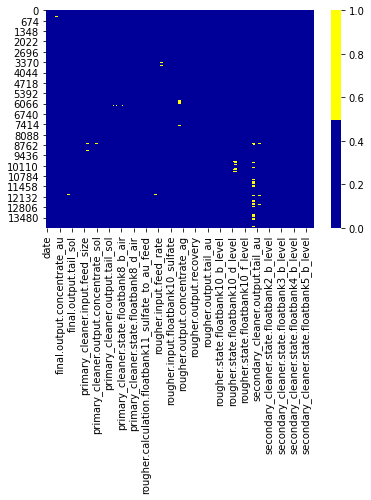

In [10]:
cols = gold_train.columns[:] 
colours = ['#000099', '#ffff00'] 
# желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(gold_train[cols].isnull(), cmap=sns.color_palette(colours)) 

In [11]:
gold_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [12]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [13]:
gold_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [14]:
gold_test.duplicated().sum()

0

In [15]:
#посмотрим дубликаты
gold_test.duplicated(subset=['date'], keep=False).sum() 

0

In [16]:
gold_test.isna().sum().sort_values(ascending = False)  

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.st

<AxesSubplot:>

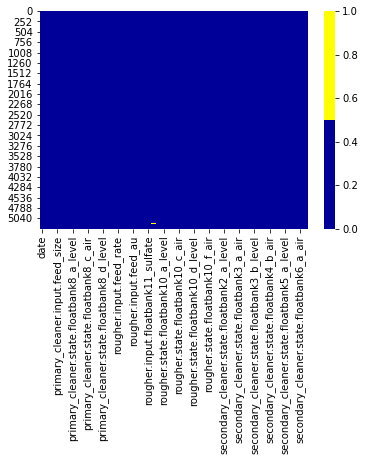

In [17]:
cols = gold_test.columns[:] 
colours = ['#000099', '#ffff00'] 
# желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(gold_test[cols].isnull(), cmap=sns.color_palette(colours)) 

In [18]:
gold_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [19]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [20]:
gold_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [21]:
gold_full.duplicated().sum()

0

In [22]:
gold_full.duplicated(subset=['date'], keep=False).sum() 

0

In [23]:
gold_full.isna().sum().sort_values(ascending = False)  

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_pb                         0
rougher.output.tail_sol                        0
date                                           0
Length: 87, dtype: int64

In [24]:
round(gold_full.isna().sum()/gold_full.shape[0]*100).sort_values(ascending = False) 

secondary_cleaner.output.tail_sol                9.0
rougher.input.floatbank11_xanthate               2.0
rougher.state.floatbank10_e_air                  2.0
primary_cleaner.output.concentrate_sol           2.0
primary_cleaner.input.xanthate                   1.0
                                                ... 
rougher.calculation.sulfate_to_au_concentrate    0.0
primary_cleaner.state.floatbank8_d_level         0.0
primary_cleaner.state.floatbank8_d_air           0.0
primary_cleaner.state.floatbank8_c_level         0.0
secondary_cleaner.state.floatbank6_a_level       0.0
Length: 87, dtype: float64

<AxesSubplot:>

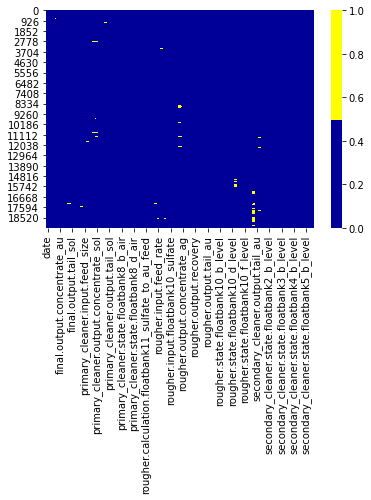

In [25]:
cols = gold_full.columns[:] 
colours = ['#000099', '#ffff00'] 
# желтый - пропущенные данные, синий - не пропущенные
sns.heatmap(gold_full[cols].isnull(), cmap=sns.color_palette(colours)) 

**Вывод:**

- В обучающей выборке 87 столбцов и 14149 строк :

 - 1 столбец дата (date), 
 - 9 столбцов финальных характеристик параметров продукта  (final.output) ,
 - 4 стобца первичной очистки параметров сырья  (primary_cleaner.input),
 - 8 стобцов первичной очистки параметров продукта (primary_cleaner.output),
 - 8 стобцов первичной очистки параметров, характеризующих текущее состояние этапа (primary_cleaner.state),
 - 4 стобца флотации расчетных характеристик (rougher.calculation),
 - 10 стобцов флотации параметров сырья (rougher.input),
 - 9 стобцов флотации параметров продукта (rougher.output),
 - 12 стобцов флотации параметров, характеризующих текущее состояние этапа (rougher.state),
 - 4 стобца вторичной очистки параметров продукта(secondary_cleaner.output),
 - 18 стобцов вторичной очистки параметров, характеризующих текущее состояние этапа (secondary_cleaner.state)

- В тестовой выборке 53 столбца и 5290 строк:

 - 1 столбец дата (date), 
 - 4 стобца первичной очистки параметров сырья (primary_cleaner.input),
 - 8 стобцов первичной очистки параметров, характеризующих текущее состояние этапа (primary_cleaner.state),
 - 10 стобцов флотации параметров сырья (rougher.input),
 - 12 стобцов флотации параметров, характеризующих текущее состояние этапа (rougher.state),
 - 18 стобцов вторичной очистки параметров, характеризующих текущее состояние этапа (secondary_cleaner.state)
 
- В исходных данных 87 столбцов и 19439 строк:

 - 1 столбец дата (date), 
 - 9 столбцов финальных характеристик параметров продукта  (final.output) ,
 - 4 стобца первичной очистки параметров сырья  (primary_cleaner.input),
 - 8 стобцов первичной очистки параметров продукта (primary_cleaner.output),
 - 8 стобцов первичной очистки параметров, характеризующих текущее состояние этапа (primary_cleaner.state),
 - 4 стобца флотации расчетных характеристик (rougher.calculation),
 - 10 стобцов флотации параметров сырья (rougher.input),
 - 9 стобцов флотации параметров продукта (rougher.output),
 - 12 стобцов флотации параметров, характеризующих текущее состояние этапа (rougher.state),
 - 4 стобца вторичной очистки параметров продукта(secondary_cleaner.output),
 - 18 стобцов вторичной очистки параметров, характеризующих текущее состояние этапа (secondary_cleaner.state)

**Технологический процесс**

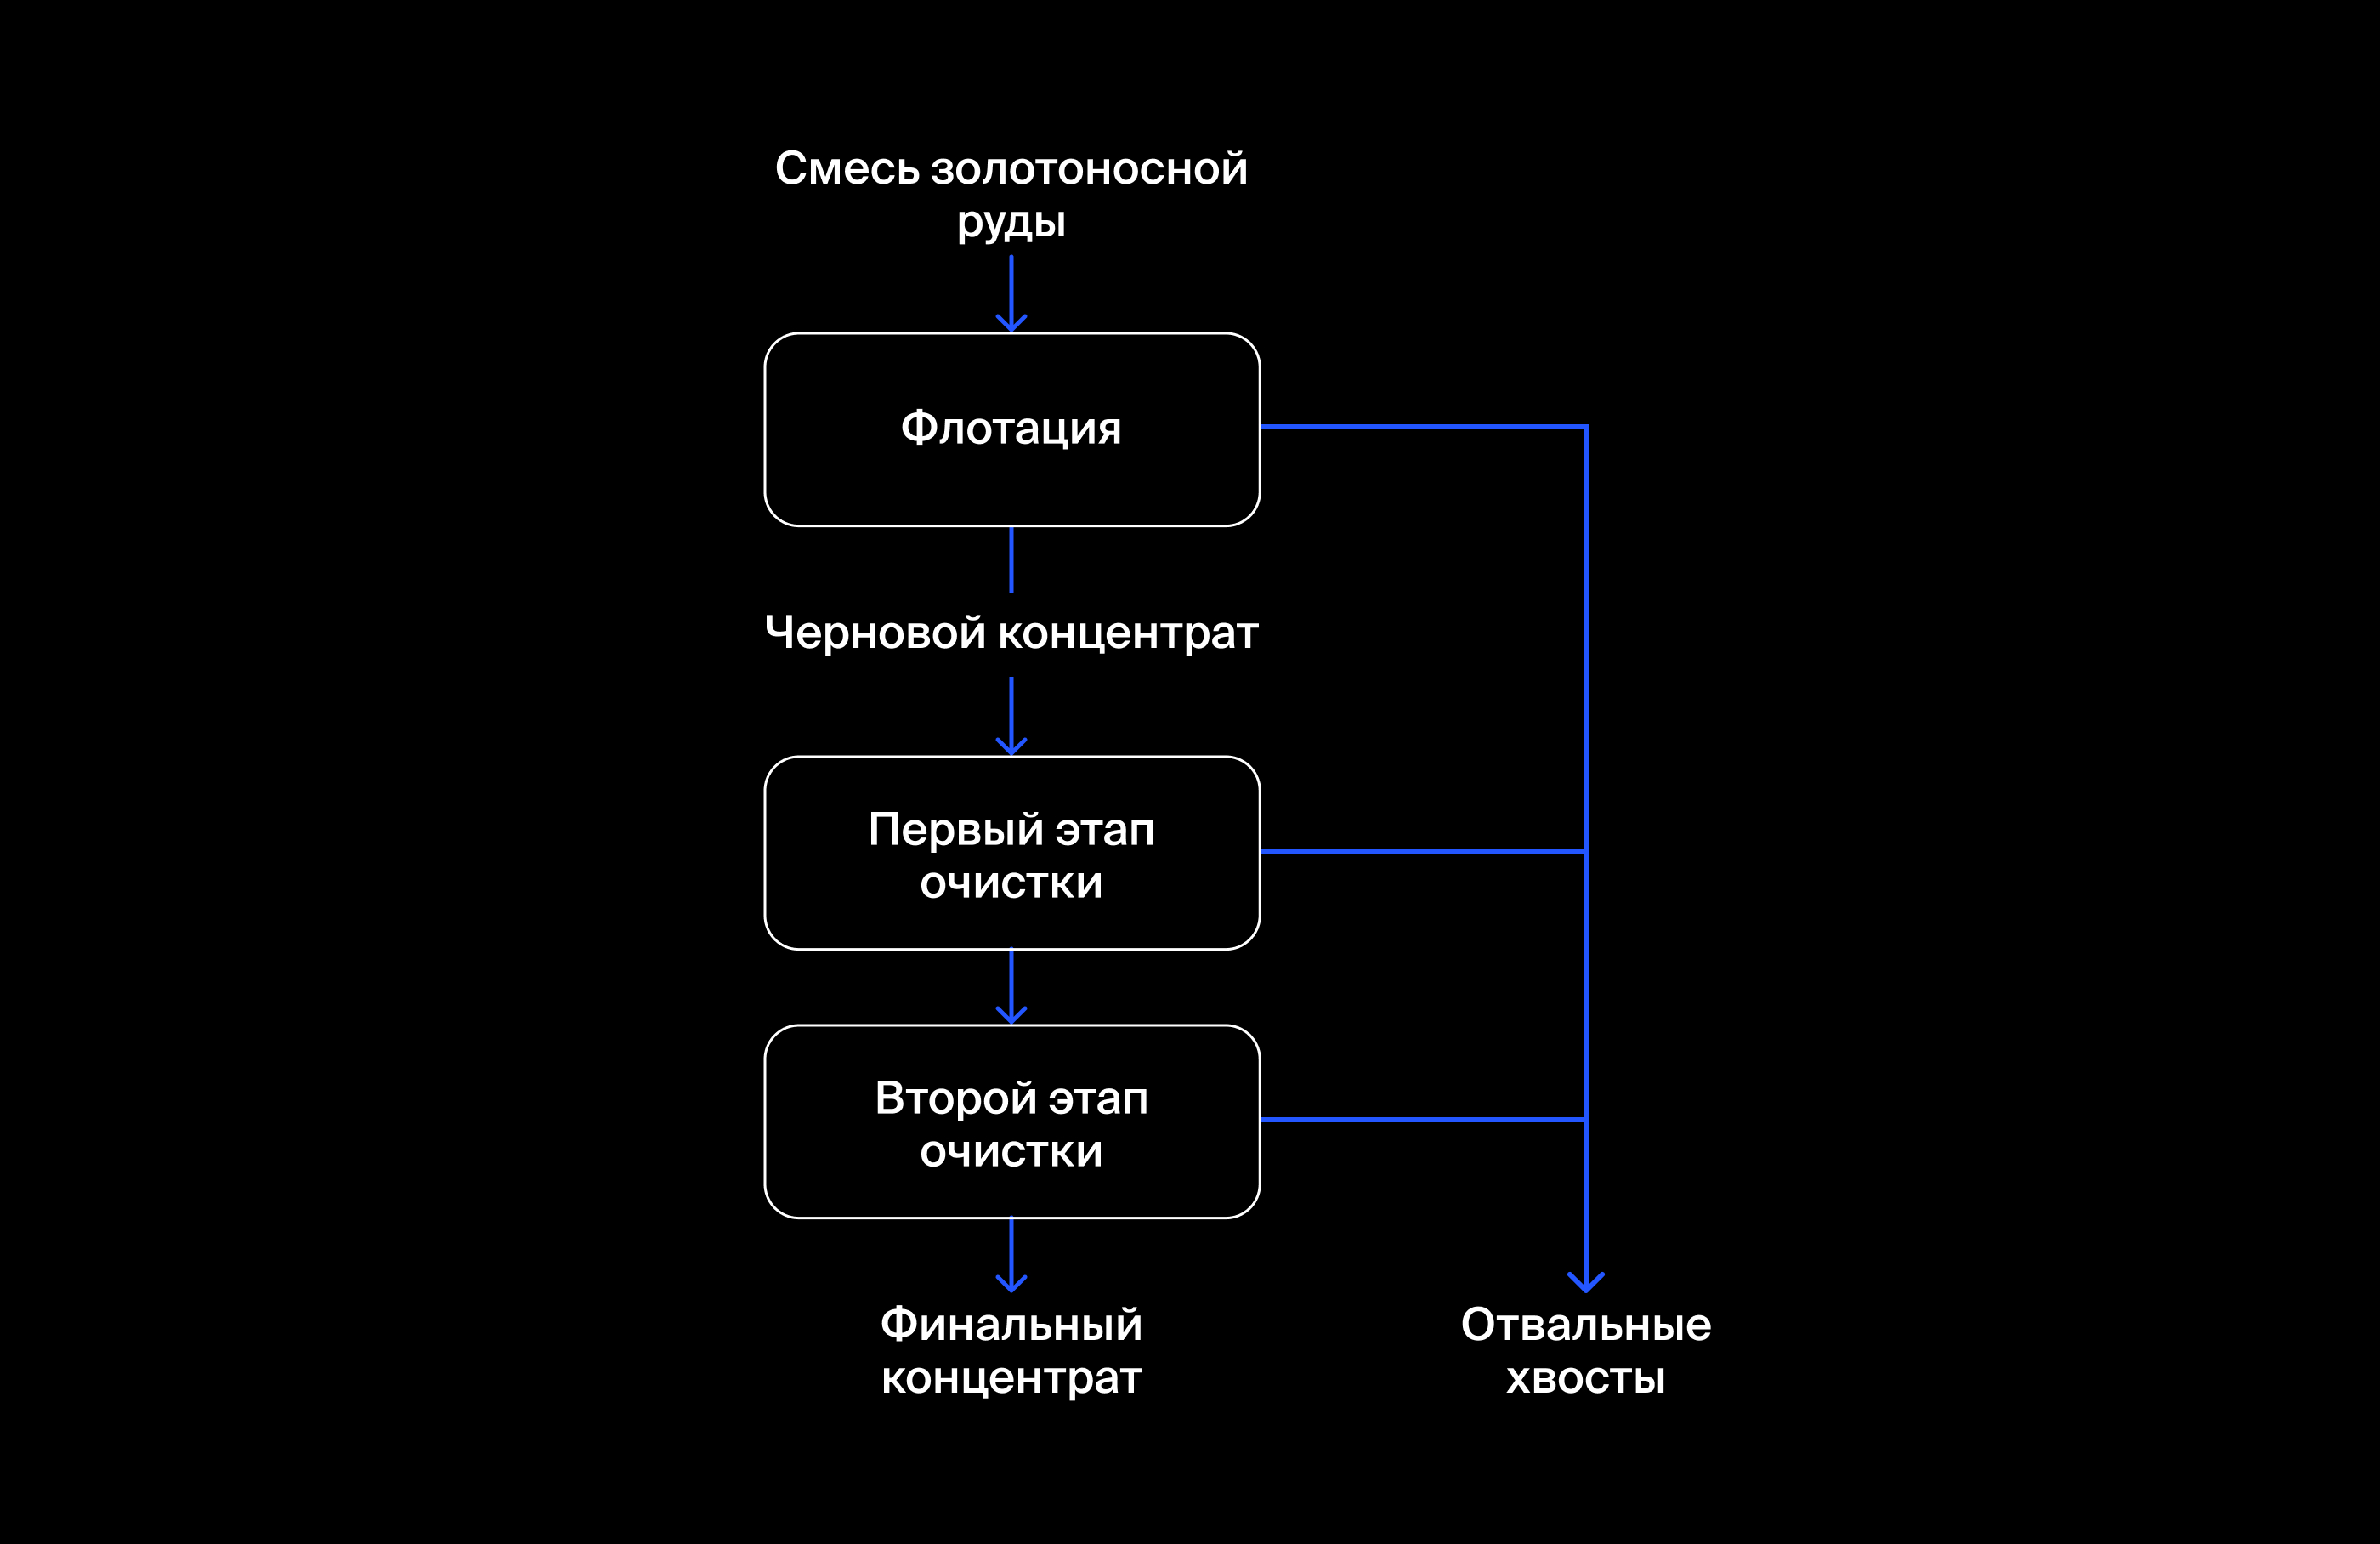

**Описание данных**:

Технологический процесс:

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
 - Xanthate **— ксантогенат (промотер, или активатор флотации);
 - Sulphate — сульфат (на данном производстве сульфид натрия);
 - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

Параметры этапов:

- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

Наименование признаков:

Значения для блока [этап]:

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Значения для блока [тип_параметра]:

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

**Эффективность обогащения рассчитывается по формуле:**

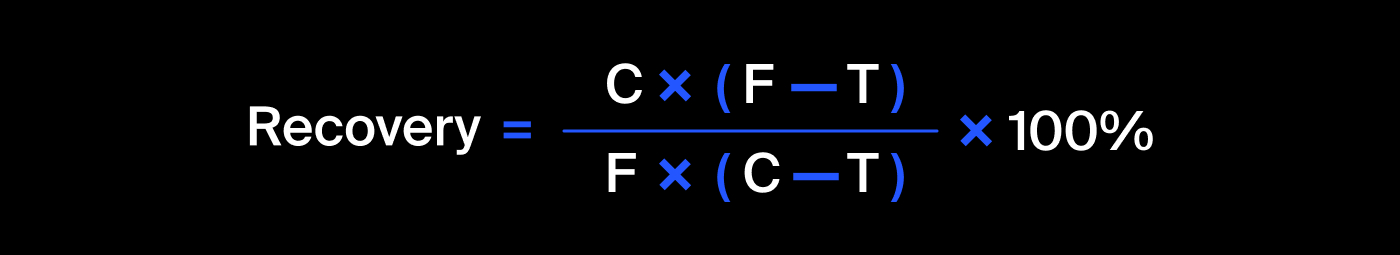

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [26]:
c_au = gold_train['rougher.output.concentrate_au'] 
f_au = gold_train['rougher.input.feed_au'] 
t_au = gold_train['rougher.output.tail_au'] 
au_recovery = (((c_au * (f_au - t_au)))/((f_au * (c_au - t_au))))*100

In [27]:
mae = (au_recovery - gold_train['rougher.output.recovery']).abs().sum() / len(gold_train)
print('MAE = ', mae)

MAE =  9.73512347450521e-15


**Вывод:**

Средняя абсолютная погрешность MAE составляет $ 9.73 \cdot 10^{-15} $, что является очень маленьким значением и можно сделать вывод, что  значения признаков в данных являются точными.

### Проанализируем признаки, недоступные в тестовой выборке

In [28]:
gold_train.columns.difference(gold_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

**Выводы:**

 В тестовой выборке недоступны 34 столбца исходных данных:
 
 - 9 столбцов финальных характеристик параметров сырья продукта  (final.output),
 - 8 стобцов первичной очистки параметров продукта (primary_cleaner.output),
 - 4 стобца флотации расчетных характеристик (rougher.calculation),
 - 9 стобцов флотации параметров продукта (rougher.output),
 - 4 стобца вторичной очистки параметров продукта(secondary_cleaner.output)
 
 Все эти данные являются уже на каждом этапе переработки параметрами продукта,т.е. окончательным значениями, которые получают после переработки сырья, что для тестовой выборки не так важно,т.к. для тестовой выборки важны входные параметры.

### Проведем предобработку данных

Используем для заполнения отсутствующего значения в кадре данных «ffill».Он принимает последнее значение, предшествующее нулевому значению, и заполняет его:

In [29]:
gold_train = gold_train.ffill()
gold_test = gold_test.ffill()
gold_full = gold_full.ffill()

Добавим недостающие столбца в тестовую выборку:

In [30]:
gold_full_new = gold_full[['date','final.output.concentrate_ag', 'final.output.concentrate_au','final.output.concentrate_pb', 'final.output.concentrate_sol',
                          'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
                          'final.output.tail_pb', 'final.output.tail_sol','primary_cleaner.output.concentrate_ag',
                          'primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb',
                          'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 
                          'primary_cleaner.output.tail_au','primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
                          'rougher.calculation.au_pb_ratio','rougher.calculation.floatbank10_sulfate_to_au_feed',
                          'rougher.calculation.floatbank11_sulfate_to_au_feed','rougher.calculation.sulfate_to_au_concentrate',
                          'rougher.output.concentrate_ag', 'rougher.output.concentrate_au','rougher.output.concentrate_pb', 
                          'rougher.output.concentrate_sol','rougher.output.recovery', 'rougher.output.tail_ag',
                          'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 
                          'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_au', 
                          'secondary_cleaner.output.tail_pb','secondary_cleaner.output.tail_sol']]
gold_test = gold_test.merge(gold_full_new, on='date', how='left')

In [31]:
# удалим столбцы, которые не понадобятся в исследовании:  date.
gold_full = gold_full.drop(['date'], axis=1)
gold_test = gold_test.drop(['date'], axis=1)
gold_train = gold_train.drop(['date'], axis=1)

In [32]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


In [33]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19439 non-null  float64
 1   final.output.concentrate_pb                         19439 non-null  float64
 2   final.output.concentrate_sol                        19439 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19439 non-null  float64
 6   final.output.tail_pb                                19439 non-null  float64
 7   final.output.tail_sol                               19439 non-null  float64
 8   final.output.tail_au                                19439 non-null  float64


In [34]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.input.sulfate                       5290 non-null   float64
 1   primary_cleaner.input.depressant                    5290 non-null   float64
 2   primary_cleaner.input.feed_size                     5290 non-null   float64
 3   primary_cleaner.input.xanthate                      5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level            5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air              5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level            5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air              5290 non-null   float64
 9

**Выводы:**

- Заполнили пропуски в строках 
- Заполнили пропущенные столбцы в тестовов выборке
- Удалили ненужные для расчета столбцы

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

У нас 4 этапа очистки:

- флотация параметров продукта (rougher.output.concentrate)
- первичная очистка параметров продукта (primary_cleaner.output.concentrate)
- финальные характеристики параметров продукта  (final.output.concentrate)

- флотация параметров сырья (rougher.input.feed)

Для начала выделим концентрацию каждого металла на всех этапах:

In [35]:
concentrate_au = gold_full[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]

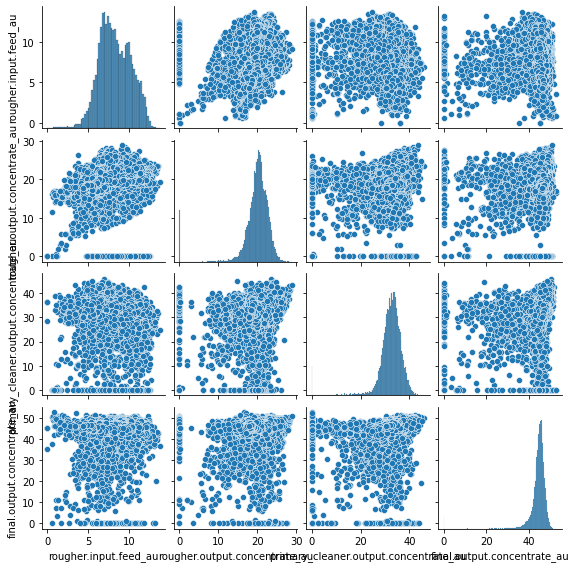

In [36]:
_ = sns.pairplot(gold_full, vars=['rougher.input.feed_au','rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],height=2)

<Figure size 432x288 with 0 Axes>

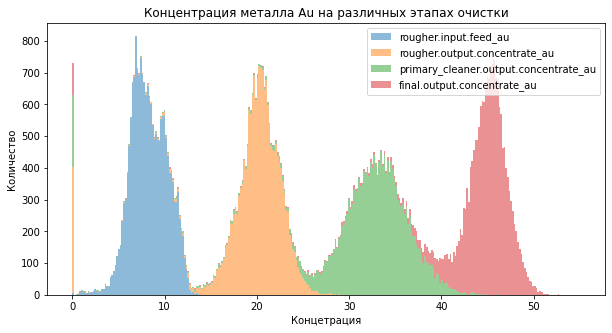

In [37]:
plt.figure()
concentrate_au.plot.hist(alpha=0.5,stacked=True, bins=300, range=(0,55),figsize=(10,5))
plt.title('Концентрация металла Au на различных этапах очистки')
plt.xlabel('Концетрация')
plt.ylabel('Количество')
plt.show()

In [38]:
concentrate_ag = gold_full[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]

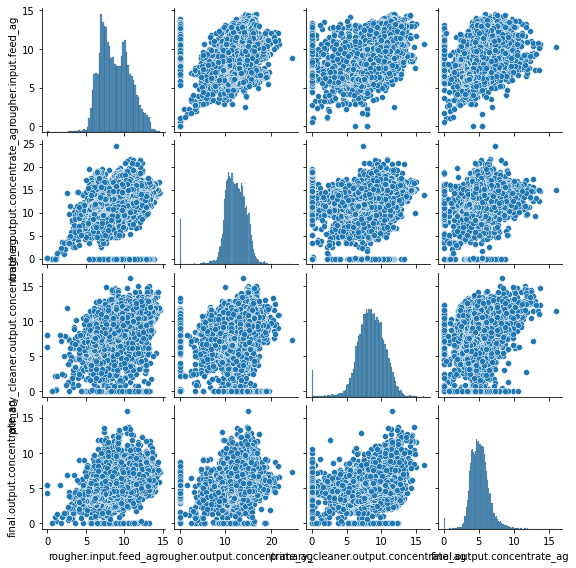

In [39]:
_ = sns.pairplot(gold_full, vars=['rougher.input.feed_ag','rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],height=2)

<Figure size 432x288 with 0 Axes>

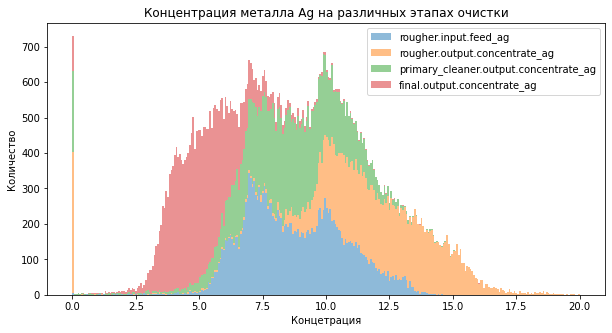

In [40]:
plt.figure()
concentrate_ag.plot.hist(alpha=0.5,stacked=True, bins=300, range=(0,20),figsize=(10,5))
plt.title('Концентрация металла Ag на различных этапах очистки')
plt.xlabel('Концетрация')
plt.ylabel('Количество')
plt.show()

In [41]:
concentrate_pb = gold_full[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

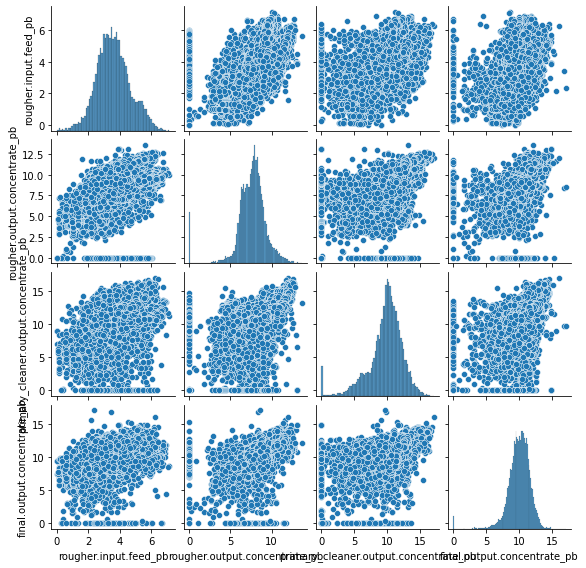

In [42]:
_ = sns.pairplot(gold_full, vars=['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'],height=2) 

<Figure size 432x288 with 0 Axes>

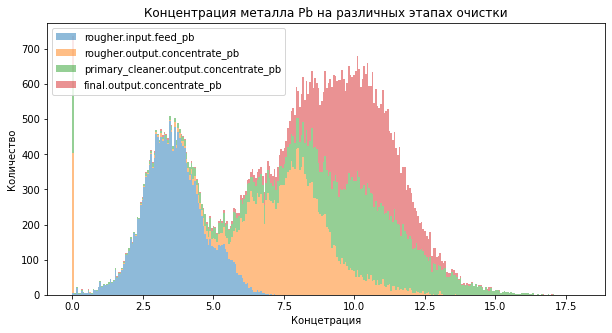

In [43]:
plt.figure()
concentrate_pb.plot.hist(alpha=0.5,stacked=True, bins=300, range=(0,18),figsize=(10,5))
plt.title('Концентрация металла Pb на различных этапах очистки')
plt.xlabel('Концетрация')
plt.ylabel('Количество')
plt.show()

In [44]:
print('Концентрация до флотации')
print('Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}'.
format(gold_full['rougher.input.feed_ag'].mean(),
gold_full['rougher.input.feed_pb'].mean(),
gold_full['rougher.input.feed_au'].mean()))
print()
print('Концентрация после флотации')
print('Коцентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}'.
format(gold_full['rougher.output.concentrate_ag'].mean(),
gold_full['rougher.output.concentrate_pb'].mean(),
gold_full['rougher.output.concentrate_au'].mean()))
print()
print('Концентрация после первичной очистки')
print('Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}'.
format(gold_full['primary_cleaner.output.concentrate_ag'].mean(),
gold_full['primary_cleaner.output.concentrate_pb'].mean(),
gold_full['primary_cleaner.output.concentrate_au'].mean()))
print()
print('Концентрация поле вторичной очистки')
print('Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}'.
format(gold_full['final.output.concentrate_ag'].mean(),
gold_full['final.output.concentrate_pb'].mean(),
gold_full['final.output.concentrate_au'].mean()))

Концентрация до флотации
Концентрация Серебра: 8.79,Свинца: 3.59,Золота: 8.27

Концентрация после флотации
Коцентрация Серебра: 11.99,Свинца: 7.61,Золота: 19.77

Концентрация после первичной очистки
Концентрация Серебра: 8.44,Свинца: 9.81,Золота: 32.12

Концентрация поле вторичной очистки
Концентрация Серебра: 5.17,Свинца: 9.98,Золота: 44.08


**Вывод:**

- Концетрация металла золота Au:

 - Происходит увеличение в зависимости от этапов очистки:
   - флотация параметров сырья (rougher.input.feed)
   - флотация параметров продукта (rougher.output.concentrate)
   - первичная очистка параметров продукта (primary_cleaner.output.concentrate)
   - финальные характеристики параметров продукта  (final.output.concentrate)
  

- Концетрация металла серебра Ag:

 - Происходит уменьшение в зависимости от этапов очистки:
   - финальные характеристики параметров продукта  (final.output.concentrate)
   - первичная очистка параметров продукта (primary_cleaner.output.concentrate)
   - флотация параметров продукта (rougher.output.concentrate)
   - флотация параметров сырья (rougher.input.feed)
  
  
- Концетрация металла свинца Pb:

 - Происходит увеличение в зависимости от этапов очистки:
   - флотация параметров сырья (rougher.input.feed)
   - флотация параметров продукта (rougher.output.concentrate)
   - первичная очистка параметров продукта (primary_cleaner.output.concentrate)
   - финальные характеристики параметров продукта  (final.output.concentrate)




###  Сравним распределения размеров гранул (feed size) сырья на обучающей и тестовой выборках 

Сравним распределние гранул на этапах:

- primary_cleaner.input.feed_size - первичная очистка параметров сырья               
- rougher.input.feed_size - флотация параметров сырья    

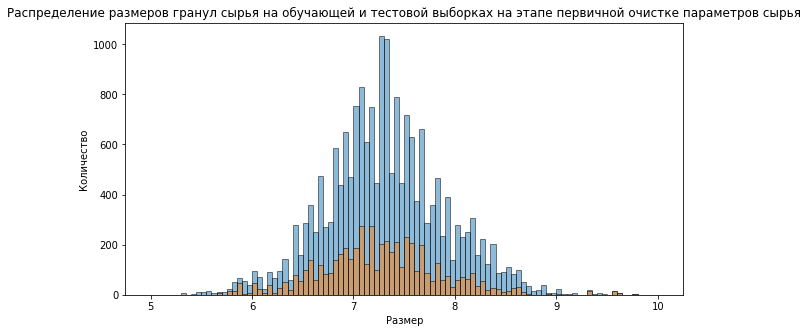

In [45]:
plt.figure()
gold_full['primary_cleaner.input.feed_size'].plot.hist(alpha=0.5,stacked=True, bins=100, range=(5,10),figsize=(10,5),edgecolor='black')
gold_test['primary_cleaner.input.feed_size'].plot.hist(alpha=0.5,stacked=True, bins=100, range=(5,10),figsize=(10,5),edgecolor='black')
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках на этапе первичной очистке параметров сырья')
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.show()

Text(0.5, 1.0, 'Размер гранул на первичной очистке параметров сырья')

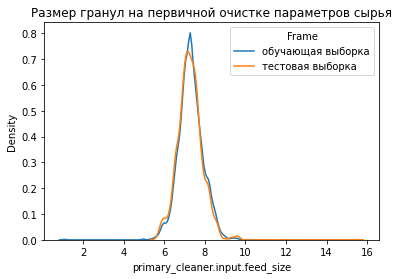

In [46]:
for frame,name in zip([gold_full,gold_test],
                       ['обучающая выборка','тестовая выборка']):
    subset = frame['primary_cleaner.input.feed_size']

    sns.distplot(subset, hist = False, kde = True,
                 label = name)
plt.legend(prop={'size': 10}, title = 'Frame')
plt.title('Размер гранул на первичной очистке параметров сырья')

In [47]:
print('Размер гранул на на первичной очистке параметров сырья')
print('Размер гранул на обучающей выборке:{: 0.2f},на тестовой выборке:{: 0.2f}'.
format(gold_full['primary_cleaner.input.feed_size'].mean(),
gold_test['primary_cleaner.input.feed_size'].mean()))

Размер гранул на на первичной очистке параметров сырья
Размер гранул на обучающей выборке: 7.31,на тестовой выборке: 7.27


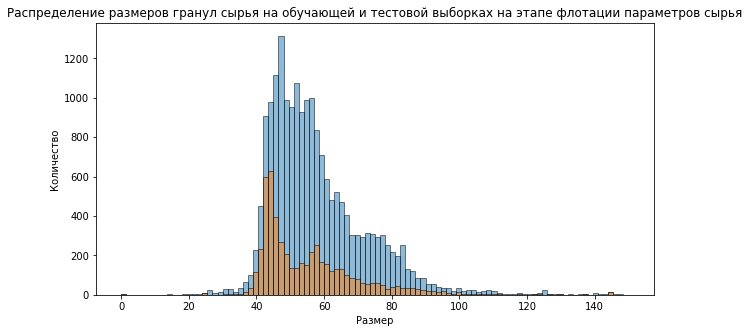

In [48]:
plt.figure()
gold_full['rougher.input.feed_size'].plot.hist(alpha=0.5, bins=100, range=(0,150),figsize=(10,5),edgecolor='black')
gold_test['rougher.input.feed_size'].plot.hist(alpha=0.5, bins=100, range=(0,150),figsize=(10,5),edgecolor='black')
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках на этапе флотации параметров сырья')
plt.xlabel('Размер')
plt.ylabel('Количество')
plt.show()

Text(0.5, 1.0, 'Размер гранул на флотации параметров сырья')

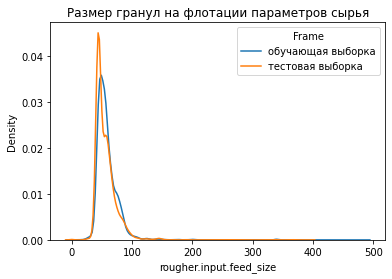

In [49]:
for frame,name in zip([gold_full,gold_test],
                       ['обучающая выборка','тестовая выборка']):
    subset = frame['rougher.input.feed_size']

    sns.distplot(subset, hist = False, kde = True,
                 label = name)
plt.legend(prop={'size': 10}, title = 'Frame')
plt.title('Размер гранул на флотации параметров сырья')


In [50]:
print('Размер гранул на флотации')
print('Размер гранул на обучающей выборке:{: 0.2f},на тестовой выборке:{: 0.2f}'.
format(gold_full['rougher.input.feed_size'].mean(),
gold_test['rougher.input.feed_size'].mean()))

Размер гранул на флотации
Размер гранул на обучающей выборке: 59.07,на тестовой выборке: 55.95


**Вывод:**

Распределение размеров гранул сырья на обучающей и тестовой выборках на этапах первичной очистки и флотации параметров сырья   равномерное, что свидетельствует о том, что оценка модели будет правильной


###  Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

У нас 3 стадии очистки:

- флотация параметров сырья (rougher.input.feed)
- флотация параметров продукта (rougher.output.concentrate)
- финальные характеристики параметров продукта  (final.output.concentrate)



Для начала просуммируем все вещества по кадой стадии:

In [51]:
gold_full['rougher.input.feed'] = gold_full['rougher.input.feed_ag'] + gold_full['rougher.input.feed_pb'] 
+ gold_full['rougher.input.feed_sol'] + gold_full['rougher.input.feed_au']

0        43.294744
1        42.231968
2        42.333852
3        42.980430
4        40.011372
           ...    
19434    42.705637
19435    43.430170
19436    44.599087
19437    44.076688
19438    43.500610
Length: 19439, dtype: float64

In [52]:
gold_full['rougher.output.concentrate']  = gold_full['rougher.output.concentrate_ag'] + gold_full['rougher.output.concentrate_pb'] 
+ gold_full['rougher.output.concentrate_sol'] + gold_full['rougher.output.concentrate_au']

0        47.823105
1        48.118038
2        47.191207
3        46.662088
4        46.257124
           ...    
19434    48.672426
19435    48.225407
19436    37.897698
19437    46.887514
19438    46.882369
Length: 19439, dtype: float64

In [53]:
gold_full['final.output.concentrate'] = gold_full['final.output.concentrate_ag'] + gold_full['final.output.concentrate_pb'] 
+ gold_full['final.output.concentrate_sol'] + gold_full['final.output.concentrate_au']

0        47.699345
1        47.959411
2        48.041259
3        47.548453
4        47.713557
           ...    
19434    53.517436
19435    53.729029
19436    53.681704
19437    53.207620
19438    53.016948
Length: 19439, dtype: float64

<Figure size 432x288 with 0 Axes>

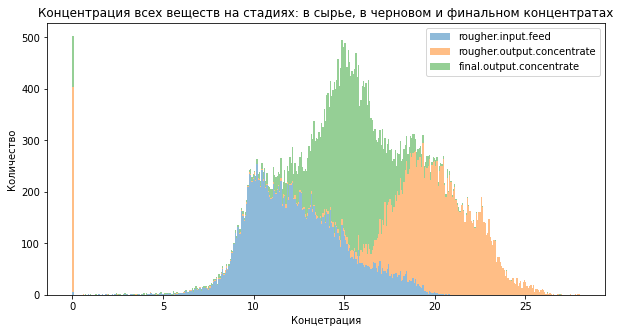

In [54]:
concentrate = gold_full[['rougher.input.feed','rougher.output.concentrate','final.output.concentrate']]
plt.figure()
concentrate.plot.hist(alpha=0.5,stacked=True, bins=400, range=(0,28),figsize=(10,5))
plt.title('Концентрация всех веществ на стадиях: в сырье, в черновом и финальном концентратах')
plt.xlabel('Концетрация')
plt.ylabel('Количество')
plt.show()

In [55]:
gold_full = gold_full.drop(['rougher.input.feed'], axis=1)
gold_full = gold_full.drop(['rougher.output.concentrate'], axis=1)
gold_full = gold_full.drop(['final.output.concentrate'], axis=1)

Удалим выбросы:

In [56]:
gold_full = gold_full.drop(index = gold_full[gold_full['rougher.input.feed_au'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['rougher.input.feed_ag'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['rougher.input.feed_pb'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['rougher.input.feed_sol'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['rougher.output.concentrate_au'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['rougher.output.concentrate_ag'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['rougher.output.concentrate_pb'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['rougher.output.concentrate_sol'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['primary_cleaner.output.concentrate_au'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['primary_cleaner.output.concentrate_ag'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['primary_cleaner.output.concentrate_pb'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['primary_cleaner.output.concentrate_sol'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['final.output.concentrate_au'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['final.output.concentrate_ag'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['final.output.concentrate_pb'] < 1].index,axis = 0)
gold_full = gold_full.drop(index = gold_full[gold_full['final.output.concentrate_sol'] < 1].index,axis = 0)

**Вывод:**

- Самая низкая концетрация на этапе флотации параметров сырья (rougher.input.feed)
- Средняя на  этапе флотации параметров продукта (rougher.output.concentrate)
- Самая высокая на финальном этапе (final.output.concentrate)
 

## Построение модели

###  Напишем функцию для вычисления итоговой sMAPE

**Формулы метрик качества:**

SMAPE = (1/n) * Σ(|forecast – actual| / ((|actual| + |forecast|)/2) * 100

где:

- Σ – символ, означающий “сумма”.
- n – размер выборки
- actual – фактическое значение данных
- forecast – прогнозируемое значение данных
                  

Нужно спрогнозировать сразу две величины:

- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

Final sMAPE=25%×sMAPE(rougher)+75%×sMAPE(final)

In [57]:
def sMAPE(target, prediction):
    return 1/len(target) * np.sum(2 * np.abs(prediction-target) / (np.abs(target) + np.abs(prediction))*100)

In [58]:
def final_sMAPE(target, prediction):
    sMAPE_rougher = sMAPE(target['rougher.output.recovery'], prediction[:,0])
    sMAPE_final = sMAPE(target['final.output.recovery'], prediction[:,1])
    final_sMAPE = (0.25*sMAPE_rougher + 0.75*sMAPE_final)
    return final_sMAPE

### Обучим разные модели и оценим их качество кросс-валидацией, выберем лучшую модель 

In [59]:
# разделим обучающую выборку
features_train = gold_train.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = gold_train[['rougher.output.recovery', 'final.output.recovery']]

In [60]:
target_train_rougher = target_train['rougher.output.recovery']
target_train_final = target_train['final.output.recovery']

In [61]:
# разделим тестовую выборку
features_test = gold_test.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test  = gold_test[['rougher.output.recovery', 'final.output.recovery']]

In [62]:
target_test_rougher = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']

In [63]:
#метрика sMAPE для модели
smape_score = make_scorer(final_sMAPE)

In [64]:
def fast_model (name_model, features, target, text):
    model = name_model
    model.fit(features, target)
    score = cross_val_score(model, features, target, cv = 5, scoring = smape_score).mean()
    print(f'Результат модели {text}:{score}')
    return score

In [65]:
linear = fast_model(LinearRegression(), features_train, target_train, 'Линейная регрессия')
decision = fast_model(DecisionTreeRegressor(random_state=12345),features_train, target_train, 'Решающее дерево')
random = fast_model(RandomForestRegressor(random_state=12345),features_train, target_train, 'Случайный лес')

Результат модели Линейная регрессия:6.540024484018813
Результат модели Решающее дерево:4.854420421029737
Результат модели Случайный лес:3.086141503105211


In [66]:
# Решающее дерево
for depth in range(1,501,100):
    # обучим модель с заданной глубиной дерева
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    # обучим модель
    model.fit(features_train, target_train)
    # найдем предсказания 
    score = cross_val_score(model, features_train, target_train,cv = 5, scoring = smape_score).mean()
print("Максимальная глубина деревьев = ", depth, ": ", score)

Максимальная глубина деревьев =  401 :  4.854420421029737


In [67]:
# Случайный лес
for est in range(10,51,10):
    model = RandomForestRegressor(random_state=12345, n_estimators=est) # обучим модель с заданным количеством деревьев
    model.fit(features_train, target_train)
    score = cross_val_score(model, features_train, target_train,cv = 5, scoring = smape_score).mean()
print("Число деревьев = ", est, ": ", score)    

Число деревьев =  50 :  3.116391866964656


**Вывод:**
Лучшее значение sMAPE у случайного леса

### Проверим качество  лучшей модели на тестовой выборке

In [69]:
model = RandomForestRegressor(random_state=12345)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
score = final_sMAPE(target_test,predictions_test)
print(f'Результат модели :{score}')

Результат модели :29.645489521056724


**Вывод:**
На тестовой выборке модель повела хуже,чем на тренировочной выборке.

### Проверим модели на вменяемость

In [73]:
dummy = DummyRegressor(strategy='mean').fit(features_train, target_train)
cross_val_score(dummy, features_test,target_test,cv = 5, scoring = smape_score).mean()

9.440601668687167

Мы получили  9.44, случайная модель показала хуже результат, чем наша модель с результатом 3.08

**Вывод:**

Таким образом, мы можем считать модель адекватной для использования.

# Общий вывод

- Концетрация металла золота Au увеличивается в зависимости от этапов очистки.
- Концетрация металла серебра Ag уменьшается в зависимости от этапов очистки.
- Концетрация металла свинца Pb увеличивается в зависимости от этапов очистки.
- Распределение размеров гранул сырья на обучающей и тестовой выборках на этапах первичной очистки и флотации параметров сырья   равномерное, что свидетельствует о том, что оценка модели будет правильной.
- Суммарная концетрация всех веществ на разных этапах увеличивается от этапа флотации параметров сырья до финального этапа. 
- Лучшая наблюдаемая модель использует RandomForestRegressor на на стандартных гиперпараметрах с симметричной средней абсолюной процентной ошибкой 3.08,которая предскажет коэффициент восстановления золота из золотосодержащей руды и оптимизирует производство, чтобы не запускать предприятие с убыточными характеристиками.
- Параметр recovery в тренировочной выборке был рассчитан верно.
- Изначально, в тестовой выборке отсутствует 34 признака.